In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import calendar

In [4]:
df = pd.read_csv('US_Accidents_March23.csv')

In [5]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [6]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
print("The Dataset contains , Rows {} & Columns {}.".format(df.shape[0],df.shape[1]))

The Dataset contains , Rows 7728394 & Columns 46.


<b>LOCATION ANALYSIS</b>

<b>CITY ANALYSIS</b>

In [8]:
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns = {'index':'City','count':'Cases'})
city_df.head()

,City,Cases
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939


In [9]:
top_10_cities = pd.DataFrame(city_df.head(10))
top_10_cities

,City,Cases
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
5,Orlando,109733
6,Austin,97359
7,Raleigh,86079
8,Nashville,72930
9,Baton Rouge,71588


C:\Users\vrani\AppData\Local\Temp\ipykernel_21200\2274310082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities['City'] , y=top_10_cities['Cases'] , ax=axes , palette='rainbow_r')


Text(0, 0.5, 'Number of Cases')

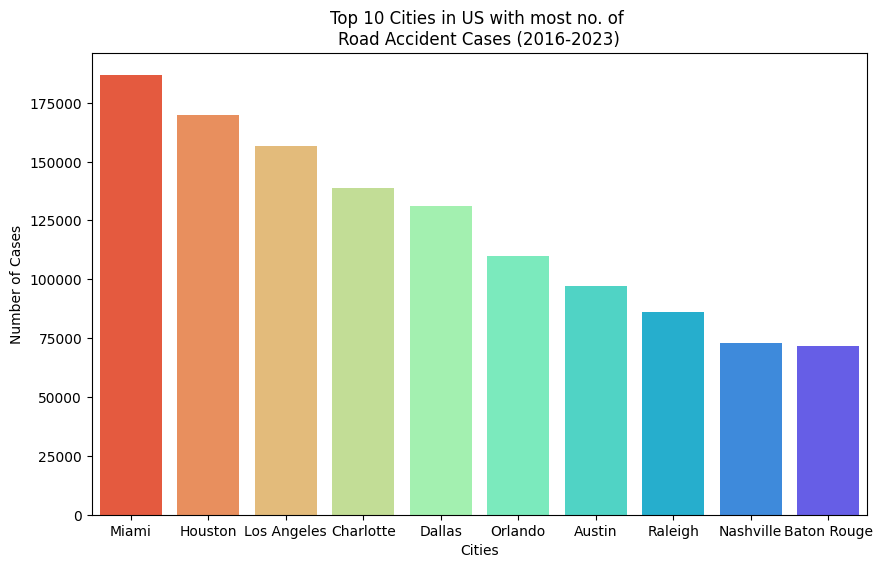

In [10]:
fig , axes = plt.subplots(figsize=(10,6))
sns.barplot(x=top_10_cities['City'] , y=top_10_cities['Cases'] , ax=axes , palette='rainbow_r')
axes.set_title("Top 10 Cities in US with most no. of \nRoad Accident Cases (2016-2023)")
axes.set_xlabel("Cities")
axes.set_ylabel("Number of Cases")


In [11]:
highest_cases = top_10_cities.Cases[0]
print('Total cases in past 8 Year :',round(highest_cases/5))
print('Average Total cases in 12 hours :',round(highest_cases/(5*365))//2)

Total cases in past 8 Year : 37383
Average Total cases in 12 hours : 51


<b>STATE ANALYSIS</b>

In [12]:
state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns = {'index':'State','count':'Cases'})
state_df.head()

,State,Cases
0,CA,1741433
1,FL,880192
2,TX,582837
3,SC,382557
4,NY,347960


In [13]:
top_10_states = state_df.head(10)
top_10_states

,State,Cases
0,CA,1741433
1,FL,880192
2,TX,582837
3,SC,382557
4,NY,347960
5,NC,338199
6,VA,303301
7,PA,296620
8,MN,192084
9,OR,179660


C:\Users\vrani\AppData\Local\Temp\ipykernel_21200\895178479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states['State'] , y=top_10_states['Cases'] , ax=axes , palette='cool_r')
C:\Users\vrani\AppData\Local\Temp\ipykernel_21200\895178479.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_yticklabels(['{:,}'.format(int(x)) for x in axes.get_yticks()] , rotation = 45 , ha = 'right')


<Axes: title={'center': 'Top 10 States in US with most no. of \nRoad Accident Cases (2016-2023)'}, xlabel='States', ylabel='Number of Cases'>

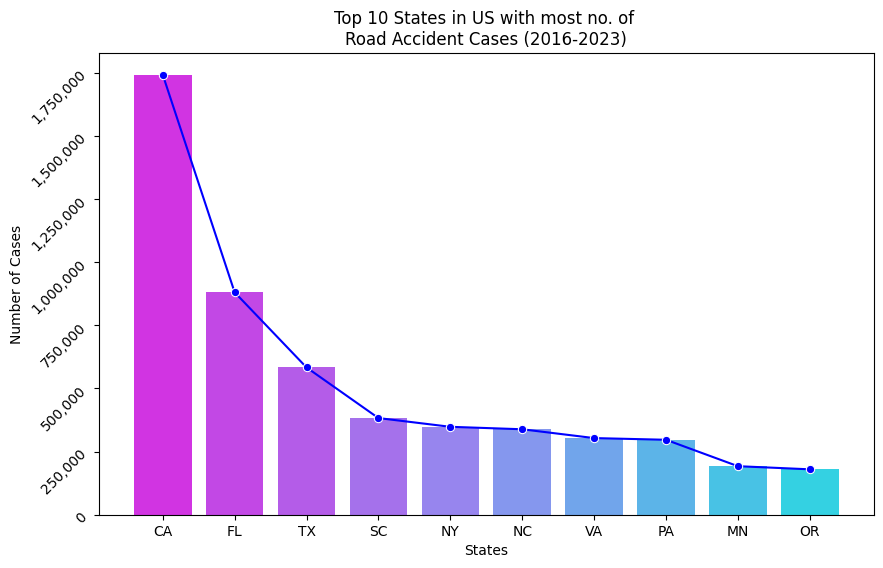

In [14]:
fig , axes = plt.subplots(figsize=(10,6))
sns.barplot(x=top_10_states['State'] , y=top_10_states['Cases'] , ax=axes , palette='cool_r')
axes.set_title("Top 10 States in US with most no. of \nRoad Accident Cases (2016-2023)")
axes.set_xlabel("States")
axes.set_ylabel("Number of Cases")
axes.set_yticklabels(['{:,}'.format(int(x)) for x in axes.get_yticks()] , rotation = 45 , ha = 'right')

sns.lineplot(data=top_10_states , x='State' , y='Cases', marker='o' , color = 'blue')


<b>TIMEZONE ANALYSIS</b>

In [15]:
timezone_df = pd.DataFrame(df['Timezone'].value_counts()).reset_index().rename(columns = {'Cases':'Timezone','count':'Cases'})
timezone_df.head()

,Timezone,Cases
0,US/Eastern,3580167
1,US/Pacific,2062984
2,US/Central,1645616
3,US/Mountain,431819


C:\Users\vrani\AppData\Local\Temp\ipykernel_21200\3751448393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=timezone_df['Timezone'] , y=timezone_df['Cases'] , ax=axes , palette='bright')
C:\Users\vrani\AppData\Local\Temp\ipykernel_21200\3751448393.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_yticklabels(['{:,}'.format(int(x)) for x in axes.get_yticks()] , rotation = 45 , ha = 'right')


[Text(0, 0.0, '0'),
 Text(0, 500000.0, '500,000'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 1500000.0, '1,500,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 2500000.0, '2,500,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 3500000.0, '3,500,000'),
 Text(0, 4000000.0, '4,000,000')]

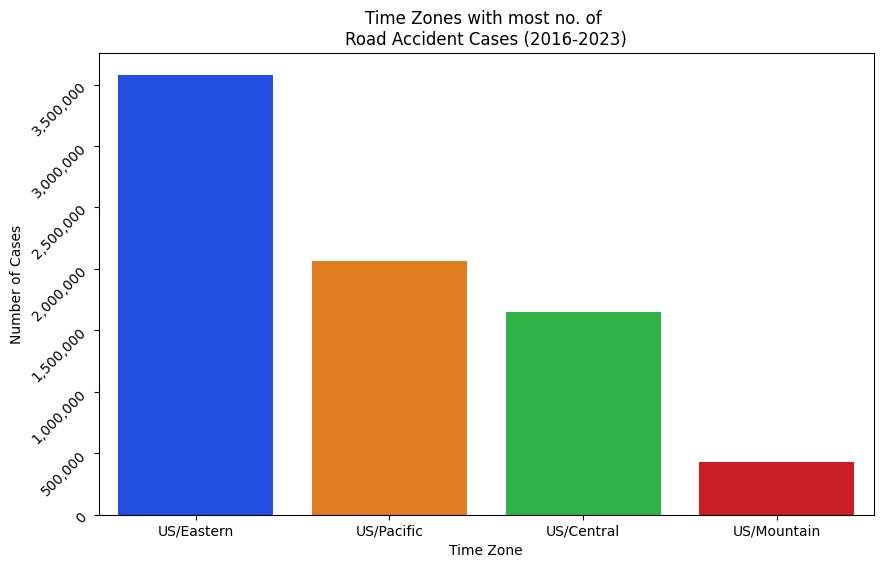

In [16]:
fig , axes = plt.subplots(figsize=(10,6))
sns.barplot(x=timezone_df['Timezone'] , y=timezone_df['Cases'] , ax=axes , palette='bright')
axes.set_title("Time Zones with most no. of \nRoad Accident Cases (2016-2023)")
axes.set_xlabel("Time Zone")
axes.set_ylabel("Number of Cases")
axes.set_yticklabels(['{:,}'.format(int(x)) for x in axes.get_yticks()] , rotation = 45 , ha = 'right')

<b>STREET ANALYSIS</b>

In [17]:
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index()
street_df.head()

,Street,count
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725


In [18]:
top_10_street = street_df.head(10)
top_10_street

,Street,count
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725
5,I-5 S,51781
6,I-80 W,39662
7,I-80 E,36113
8,I-405 N,32364
9,I-75 N,28166


C:\Users\vrani\AppData\Local\Temp\ipykernel_21200\2513841814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_street['Street'] , y=top_10_street['count'] , ax=axes , palette='rainbow_r')


Text(0, 0.5, 'Number of Cases')

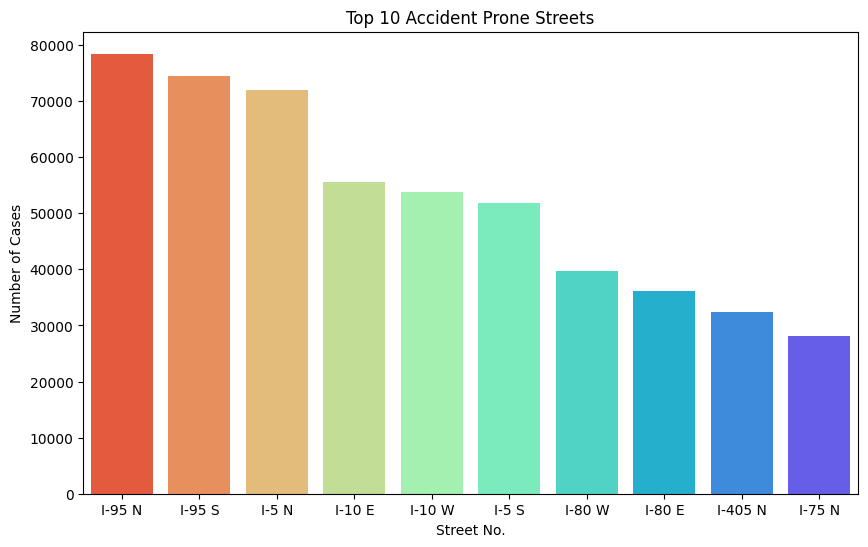

In [19]:
fig , axes = plt.subplots(figsize=(10,6))
sns.barplot(x=top_10_street['Street'] , y=top_10_street['count'] , ax=axes , palette='rainbow_r')
axes.set_title("Top 10 Accident Prone Streets")
axes.set_xlabel("Street No.")
axes.set_ylabel("Number of Cases")


<b>SEVERITY ANALYSIS</b>

In [20]:
severity_df = pd.DataFrame(df['Severity'].value_counts()).reset_index().rename(columns={'Severity':'Severity','count':'Cases'})
severity_df.head()

,Severity,Cases
0,2,6156981
1,3,1299337
2,4,204710
3,1,67366


C:\Users\vrani\AppData\Local\Temp\ipykernel_21200\1821774255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_df['Severity'] , y=severity_df['Cases'] , ax=axes , palette='rainbow_r')
C:\Users\vrani\AppData\Local\Temp\ipykernel_21200\1821774255.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_yticklabels(['{:,}'.format(int(x)) for x in axes.get_yticks()] , rotation = 45 , ha = 'right')


[Text(0, 0.0, '0'),
 Text(0, 1000000.0, '1,000,000'),
 Text(0, 2000000.0, '2,000,000'),
 Text(0, 3000000.0, '3,000,000'),
 Text(0, 4000000.0, '4,000,000'),
 Text(0, 5000000.0, '5,000,000'),
 Text(0, 6000000.0, '6,000,000'),
 Text(0, 7000000.0, '7,000,000')]

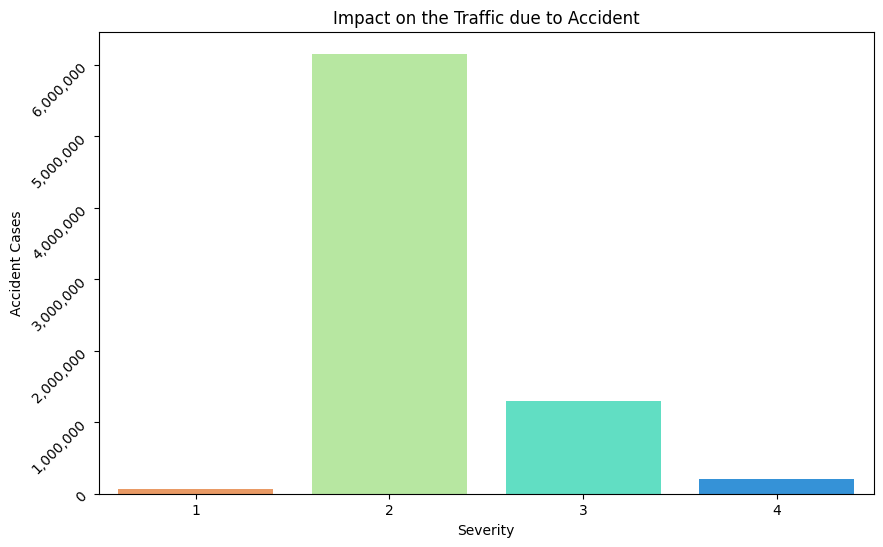

In [21]:
fig , axes = plt.subplots(figsize=(10,6))
sns.barplot(x=severity_df['Severity'] , y=severity_df['Cases'] , ax=axes , palette='rainbow_r')
axes.set_title("Impact on the Traffic due to Accident")
axes.set_xlabel("Severity")
axes.set_ylabel("Accident Cases")
axes.set_yticklabels(['{:,}'.format(int(x)) for x in axes.get_yticks()] , rotation = 45 , ha = 'right')

<b>YEARLY ANALYSIS</b>

In [22]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

In [23]:
total_cases = city_df['Cases'].sum()
print(total_cases)

7728141


In [24]:
year_df = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={'Start_Time':'Year','count':'Cases'})
year_df

,Year,Cases
0,2021.0,1412433
1,2022.0,1268806
2,2020.0,1161598
3,2019.0,954302
4,2018.0,893426
5,2017.0,717290
6,2016.0,410821
7,2023.0,166552


C:\Users\vrani\AppData\Local\Temp\ipykernel_21200\2384087114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_df['Year'] , y=year_df['Cases'] , ax=axes , palette='rainbow_r')


Text(0, 0.5, 'Accident Cases')

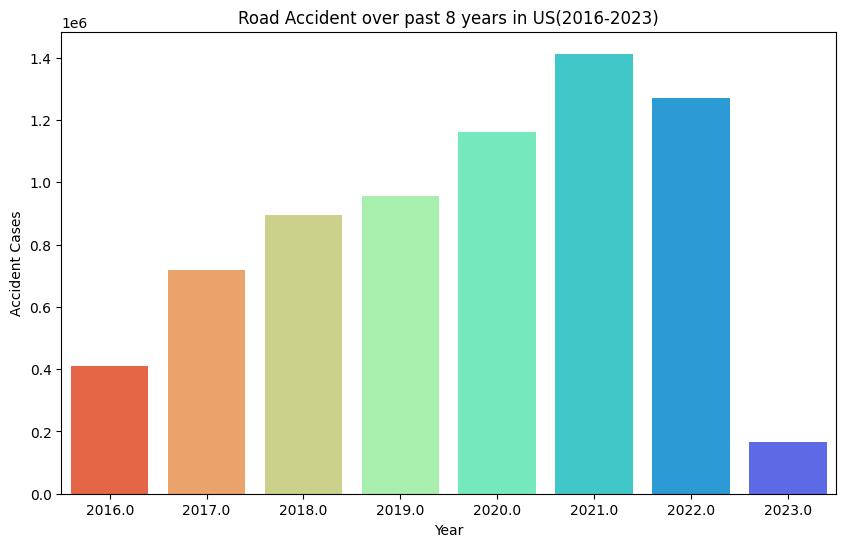

In [25]:
fig , axes = plt.subplots(figsize=(10,6))
sns.barplot(x=year_df['Year'] , y=year_df['Cases'] , ax=axes , palette='rainbow_r')
axes.set_title("Road Accident over past 8 years in US(2016-2023)")
axes.set_xlabel("Year")
axes.set_ylabel("Accident Cases")

<b>MONTHLY ANALYSIS</b>

In [26]:
month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'Start_Time':'Month','count':'Cases'})
month_names = list(calendar.month_name)[1:]
month_df.Month = month_names
month_df

,Month,Cases
0,January,758783
1,February,695612
2,March,652682
3,April,630325
4,May,593815
5,June,585606
6,July,547206
7,August,526210
8,September,524750
9,October,505614


C:\Users\vrani\AppData\Local\Temp\ipykernel_21200\3919223307.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_df['Month'] , y=month_df['Cases'] , ax=axes , palette='bright')


Text(0, 0.5, 'Accident Cases')

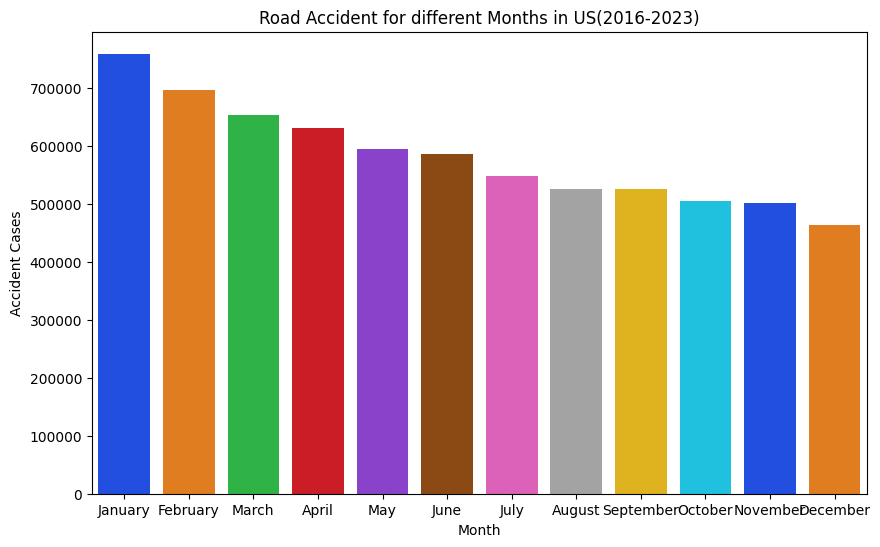

In [27]:
fig , axes = plt.subplots(figsize=(10,6))
sns.barplot(x=month_df['Month'] , y=month_df['Cases'] , ax=axes , palette='bright')
axes.set_title("Road Accident for different Months in US(2016-2023)")
axes.set_xlabel("Month")
axes.set_ylabel("Accident Cases")

<b>DAY'S ANALYSIS</b>

In [28]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'Start_Time':'Day','count':'Cases'})
day_df

,Day,Cases
0,Friday,1237229
1,Thursday,1196137
2,Wednesday,1195864
3,Tuesday,1177923
4,Monday,1108807
5,Saturday,579153
6,Sunday,490115


C:\Users\vrani\AppData\Local\Temp\ipykernel_21200\528481965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df['Day'] , y=day_df['Cases'] , ax=axes , palette='bright')


Text(0, 0.5, 'Accident Cases')

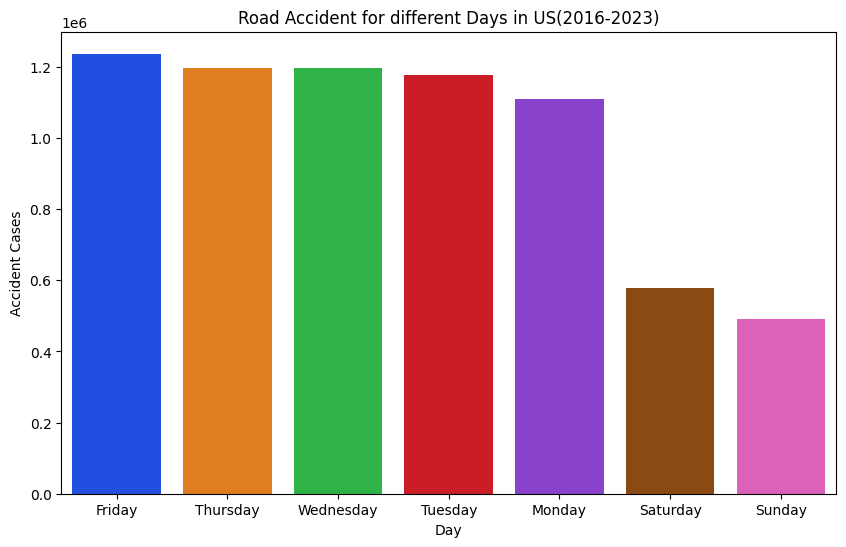

In [29]:
fig , axes = plt.subplots(figsize=(10,6))
sns.barplot(x=day_df['Day'] , y=day_df['Cases'] , ax=axes , palette='bright')
axes.set_title("Road Accident for different Days in US(2016-2023)")
axes.set_xlabel("Day")
axes.set_ylabel("Accident Cases")

<b>HOUR'S ANALYSIS</b>

In [30]:
hour_df = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'Start_Time':'Hour','count':'Cases'}).sort_values('Hour')
hour_df

,Hour,Cases
20,0.0,98452
21,1.0,85743
22,2.0,82394
23,3.0,74229
17,4.0,149077
14,5.0,209579
7,6.0,375179
0,7.0,546789
1,8.0,541643
9,9.0,334067


C:\Users\vrani\AppData\Local\Temp\ipykernel_21200\2612763014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_df['Hour'] , y=hour_df['Cases'] , ax=axes , palette='bright')


Text(0, 0.5, 'Accident Cases')

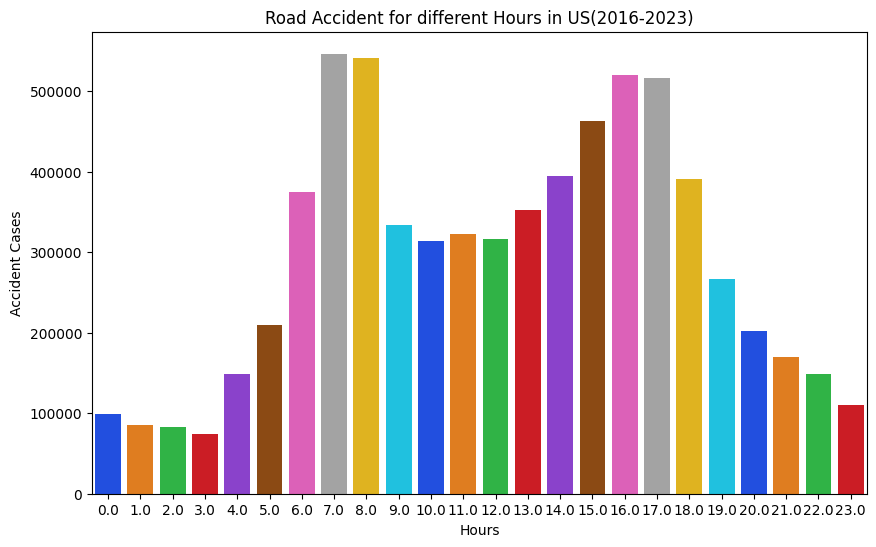

In [31]:
fig , axes = plt.subplots(figsize=(10,6))
sns.barplot(x=hour_df['Hour'] , y=hour_df['Cases'] , ax=axes , palette='bright')
axes.set_title("Road Accident for different Hours in US(2016-2023)")
axes.set_xlabel("Hours")
axes.set_ylabel("Accident Cases")

<b>WEATHER ANALYSIS</b>

In [32]:
weather_condition_df = pd.DataFrame(df.Weather_Condition.value_counts().head(10)).reset_index().rename({'Weather_Condition':'Weather_Condition','count':'Cases'})
weather_condition_df

,Weather_Condition,count
0,Fair,2560802
1,Mostly Cloudy,1016195
2,Cloudy,817082
3,Clear,808743
4,Partly Cloudy,698972
5,Overcast,382866
6,Light Rain,352957
7,Scattered Clouds,204829
8,Light Snow,128680
9,Fog,99238


C:\Users\vrani\AppData\Local\Temp\ipykernel_21200\2132430716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = weather_condition_df['Weather_Condition'] , x = weather_condition_df['count'] , ax=axes , palette='bright')


Text(0, 0.5, 'Weather Condition')

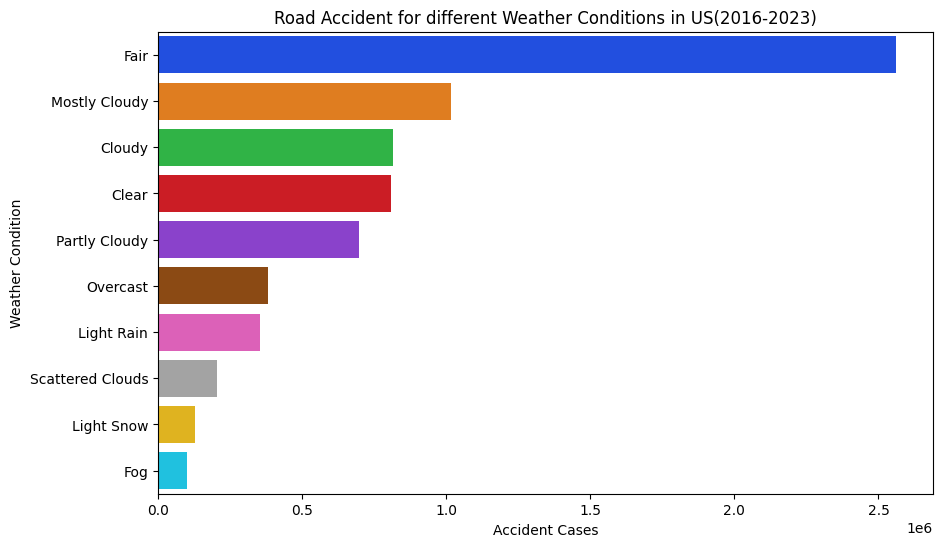

In [33]:
fig , axes = plt.subplots(figsize=(10,6))
sns.barplot(y = weather_condition_df['Weather_Condition'] , x = weather_condition_df['count'] , ax=axes , palette='bright')
axes.set_title("Road Accident for different Weather Conditions in US(2016-2023)")
axes.set_xlabel("Accident Cases")
axes.set_ylabel("Weather Condition")